Dataset Preview:
         date        state   district  female  male  deaths
0  01-01-2018  Maharashtra  Nandurbar     301   500     801
1  02-01-2018  Maharashtra      Dhule     330   549     879
2  03-01-2018  Maharashtra    Jalgaon     370   588     958
3  04-01-2018  Maharashtra    Buldana     223   310     533
4  04-01-2018  Maharashtra      Akola     378   537     915
Data exported successfully to C:/Users/asus/Downloads/Maharashtra-districts2.csv
Available columns in the dataset:
Index(['date', 'state', 'district', 'female', 'male', 'deaths'], dtype='object')


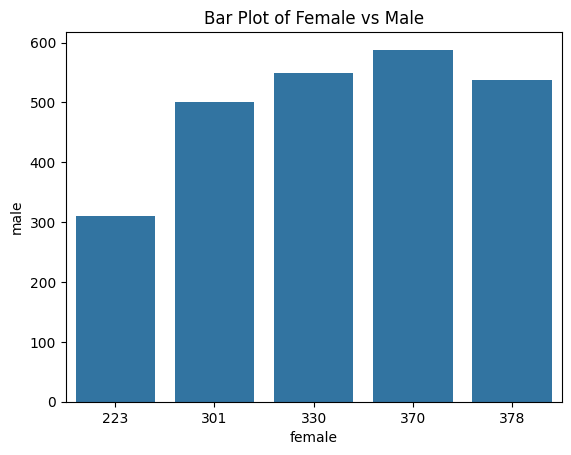

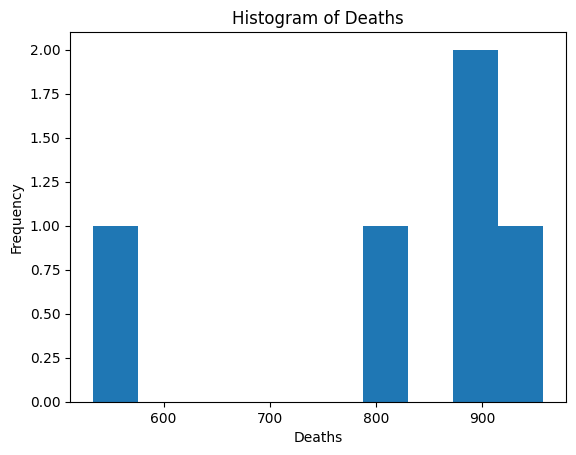

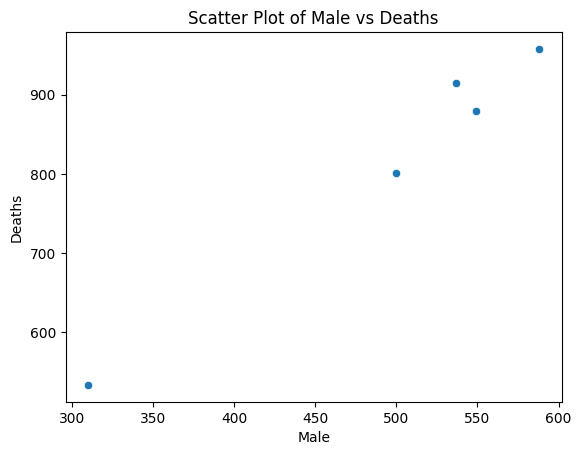

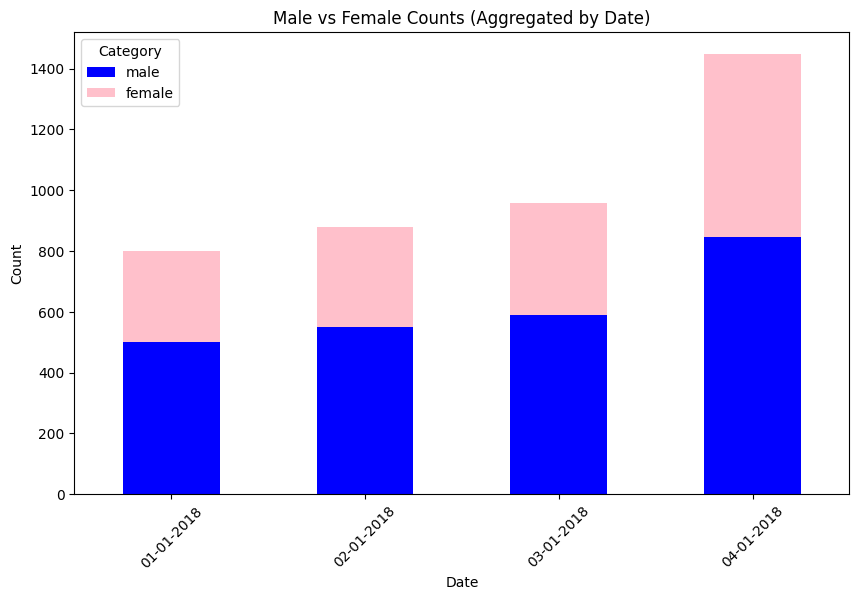

Data after preprocessing:
   date  state  district    female      male    deaths
0     0      0         4  0.503226  0.683453  0.630588
1     1      0         2  0.690323  0.859712  0.814118
2     2      0         3  0.948387  1.000000  1.000000
3     3      0         1  0.000000  0.000000  0.000000
4     3      0         0  1.000000  0.816547  0.898824


In [3]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Input and output file paths
input_file = "C:/Users/asus/Downloads/Maharashtra-districts.csv"
output_file = "C:/Users/asus/Downloads/Maharashtra-districts2.csv"

# Load dataset
try:
    data = pd.read_csv(input_file)
    print("Dataset Preview:")
    print(data.head())
except FileNotFoundError:
    print(f"Error: The file {input_file} was not found.")
    exit()

# Export a preview of the dataset
try:
    data.head().to_csv(output_file, index=False)
    print(f"Data exported successfully to {output_file}")
except Exception as e:
    print(f"Error exporting data: {e}")

# Data Visualization
print("Available columns in the dataset:")
print(data.columns)

# Ensure the required columns are present before plotting
if {'female', 'male'}.issubset(data.columns):
    sns.barplot(x='female', y='male', data=data)
    plt.title('Bar Plot of Female vs Male')
    plt.show()
else:
    print("Error: Columns 'female' and 'male' not found in dataset.")

if 'deaths' in data.columns:
    data['deaths'].plot(kind='hist', bins=10, title='Histogram of Deaths')
    plt.xlabel('Deaths')
    plt.show()
else:
    print("Error: Column 'deaths' not found in dataset.")

if {'male', 'deaths'}.issubset(data.columns):
    sns.scatterplot(x='male', y='deaths', data=data)
    plt.title('Scatter Plot of Male vs Deaths')
    plt.xlabel('Male')
    plt.ylabel('Deaths')
    plt.show()
else:
    print("Error: Columns 'male' and 'deaths' not found in dataset.")

# Aggregating the data
if {'date', 'male', 'female'}.issubset(data.columns):
    agg_data = data.groupby('date')[['male', 'female']].sum().reset_index()
    agg_data.plot(
        x='date',
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        title='Male vs Female Counts (Aggregated by Date)',
        color=['blue', 'pink']
    )
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.show()
else:
    print("Error: Columns 'date', 'male', and 'female' not found in dataset.")

# Data Preprocessing
try:
    # Handle missing values by filling numeric columns with the median
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

    # Normalize numerical columns
    scaler = MinMaxScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    # Encode categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        data[col] = encoder.fit_transform(data[col])

    print("Data after preprocessing:")
    print(data.head())
except Exception as e:
    print(f"Error during preprocessing: {e}")


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# File paths
input_path = "C:/Users/asus/Downloads/Maharashtra-districts.csv"
output_path = "C:/Users/asus/Downloads/Maharashtra-districts2.csv"

# Load dataset
try:
    df = pd.read_csv(input_path)
    print("Dataset Preview:\n", df.head())
except FileNotFoundError:
    print(f"Error: File not found at {input_path}")
    exit()

# Export preview of dataset
try:
    df.head().to_csv(output_path, index=False)
    print(f"Preview exported to {output_path}")
except Exception as e:
    print(f"Export Error: {e}")

# Display available columns
print("Available Columns:", list(df.columns))

# Bar Plot: Female vs Male
if {'female', 'male'}.issubset(df.columns):
    sns.barplot(x='female', y='male', data=df)
    plt.title('Bar Plot: Female vs Male')
    plt.show()
else:
    print("Missing columns for Female vs Male plot")

# Histogram: Deaths
if 'deaths' in df.columns:
    df['deaths'].plot(kind='hist', bins=10, title='Histogram: Deaths')
    plt.xlabel('Deaths')
    plt.show()
else:
    print("Column 'deaths' not found for histogram")

# Scatter Plot: Male vs Deaths
if {'male', 'deaths'}.issubset(df.columns):
    sns.scatterplot(x='male', y='deaths', data=df)
    plt.title('Scatter Plot: Male vs Deaths')
    plt.xlabel('Male')
    plt.ylabel('Deaths')
    plt.show()
else:
    print("Missing columns for Male vs Deaths scatter plot")

# Aggregated Bar Plot by Date
if {'date', 'male', 'female'}.issubset(df.columns):
    agg = df.groupby('date')[['male', 'female']].sum().reset_index()
    agg.plot(x='date', kind='bar', stacked=True, figsize=(10, 6),
             title='Male vs Female by Date', color=['blue', 'pink'])
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.show()
else:
    print("Missing columns for date-wise aggregation")

# Data Preprocessing
try:
    # Fill missing numeric values with median
    num_cols = df.select_dtypes(include=['number']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Normalize numeric columns
    df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

    # Encode categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    print("Preprocessed Data:\n", df.head())
except Exception as e:
    print(f"Preprocessing Error: {e}")
